In [435]:
from matplotlib import pyplot as plt
import pandas as pd
import expected_max_performance
from matplotlib.ticker import PercentFormatter

import numpy as np

import yaml

In [436]:
with open("../hyperopt-results.yml", "r") as fh:
    rows = yaml.safe_load(fh)
    data = dict(zip(map(lambda x: x["name"], rows), rows))

In [437]:
f"we have {len(data)} experiments"

'we have 16 experiments'

./stats/seq_sy_lstm_bi_crf.yaml-2020-06-03--18-10.20.csv
--😎 BiLSTM-CRF(SY)-BI
seq_sy_lstm size=2697374
Val WL-F1=0.9720 ./artifacts/seq_sy_lstm_bi_crf.yaml-2020-06-03--18-10.20/run-9
  min=0.9699  |  max=0.9720
TEST: CL-f1=0.9786 WL-f1=0.9551 ⚠️ AVG TEST: WL-f1=0.9532±0.0012
bi:1|cells:448|crf:1|do:0.14646484257722364|embs:64|l1:28|oc:BI lr=6.45e-04 weight_decay=4.00e-04
avg traiing 130.77619217236835
./stats/seq_sy_lstm_crf_scheme_a.yaml-2020-06-03--23-34.20.csv
--😎 BiLSTM-CRF(SY)-SchemeA
seq_sy_lstm size=2997807
Val WL-F1=0.9690 ./artifacts/seq_sy_lstm_crf_scheme_a.yaml-2020-06-03--23-34.20/run-7
  min=0.9682  |  max=0.9690
TEST: CL-f1=0.9772 WL-f1=0.9512 ⚠️ AVG TEST: WL-f1=0.9513±0.0011
bi:1|cells:484|crf:1|do:0.46318656654410684|embs:64|l1:39|oc:SchemeASyLevel lr=6.37e-04 weight_decay=3.70e-05
avg traiing 139.17936933835347
./stats/seq_sy_lstm_crf_scheme_b.yaml-2020-06-03--23-35.20.csv
--😎 BiLSTM-CRF(SY)-SchemeB
seq_sy_lstm size=2572503
Val WL-F1=0.9697 ./artifacts/seq_sy_lstm_crf

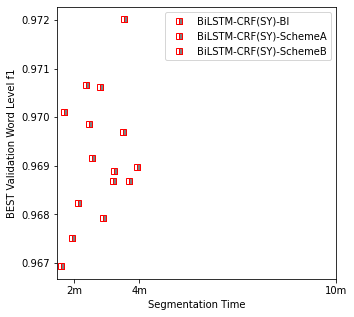

In [450]:
def marker(k):
    if "CNN" in k:
        return "o"
    elif "UniLSTM" in k:
        return "*"
    elif "BiLSTM" in k:
        return "s"
    
def markercolor(k):
    if "SY" in k:
#         if "SchemeA" in k:
# #             return "#FDB90A"
#         elif "SchemeB" in k:
#             return "#25CFFF"
# #         elif "CBOW" in k:
#             return "red"
#         elif "Skipgram" in k:
#             return "blue"

        return "gray"
    else:
        return "white"
    
def plot_hyperopt(families, n=10):
    plt.figure(figsize=(5, 5))
    # draw max line
    for k in families:
        print(data[k]["path"])
        df = pd.read_csv(data[k]["path"]).sort_values(by="best-val:word_level:f1", ascending=False)[:n]
        
        best_model = df[df["best-val:word_level:f1"] == df["best-val:word_level:f1"].max()].to_dict("row")[0]
        print(f"--😎 {k}")

        print(best_model["name"], "size=%d" % best_model["num_trainable_params"])
        print("Val WL-F1=%.4f" % best_model["best-val:word_level:f1"], best_model["best-val:model_path"])
        print("  min=%.4f" % df["best-val:word_level:f1"].min(), " | ", "max=%.4f" % df["best-val:word_level:f1"].max() )
        print(
            "TEST: CL-f1=%.4f" % best_model["best-test:char_level:f1"],
            "WL-f1=%.4f" % best_model["best-test:word_level:f1"],
            "⚠️ AVG TEST: WL-f1=%.4f±%.4f" % (df["best-test:word_level:f1"].mean(), df["best-test:word_level:f1"].std()) 
        )

        print(best_model["params"], "lr=%.2e"%best_model["lr"], "weight_decay=%.2e" % best_model["weight_decay"],)
        print("avg traiing", df["training_took"].mean()/60)
        plt.plot(
            df["best-val:time_took"] / 60 , df["best-val:word_level:f1"],
            lw=0,
            label=k,
            marker=marker(k),
            markeredgecolor="red" if "CRF" in k else "black",
            markerfacecolor=markercolor(k),
#             "gray" if "SY" in k else "white",
            fillstyle="right" if "(SY)" in k else "full",
            markerfacecoloralt="white"
        )

    plt.ylabel("BEST Validation Word Level f1")
    plt.xlabel("Segmentation Time")
    plt.xticks([2, 4, 10], ["2m", "4m", "10m"])
    
    plt.legend()
    
plot_hyperopt([
    "BiLSTM-CRF(SY)-BI",
    "BiLSTM-CRF(SY)-SchemeA",
    "BiLSTM-CRF(SY)-SchemeB",
], n=5)

./stats/seq_sy_lstm_bi.yaml-2020-06-03--23-35.20.csv
--😎 BiLSTM(SY)-BI
seq_sy_lstm size=1595134
Val WL-F1=0.9709 ./artifacts/seq_sy_lstm_bi.yaml-2020-06-03--23-35.20/run-1
  min=0.9687  |  max=0.9709
TEST: CL-f1=0.9786 WL-f1=0.9546 ⚠️ AVG TEST: WL-f1=0.9524±0.0018
bi:1|cells:274|crf:0|do:0.1567057923547318|embs:64|l1:36|oc:BI lr=7.21e-04 weight_decay=4.77e-04
avg traiing 30.97887813647588
./stats/seq_sy_lstm_scheme_a.yaml-2020-06-03--23-35.20.csv
--😎 BiLSTM(SY)-SchemeA
seq_sy_lstm size=1869546
Val WL-F1=0.9708 ./artifacts/seq_sy_lstm_scheme_a.yaml-2020-06-03--23-35.20/run-2
  min=0.9672  |  max=0.9708
TEST: CL-f1=0.9783 WL-f1=0.9540 ⚠️ AVG TEST: WL-f1=0.9509±0.0020
bi:1|cells:326|crf:0|do:0.21672152907370673|embs:64|l1:26|oc:SchemeASyLevel lr=9.95e-04 weight_decay=5.67e-04
avg traiing 25.120312239329017
./stats/seq_sy_lstm_scheme_b.yaml-2020-06-03--23-35.20.csv
--😎 BiLSTM(SY)-SchemeB
seq_sy_lstm size=2173258
Val WL-F1=0.9694 ./artifacts/seq_sy_lstm_scheme_b.yaml-2020-06-03--23-35.20/ru

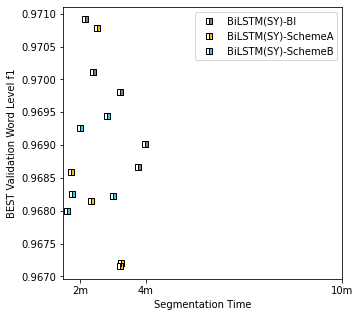

In [378]:
plot_hyperopt([
    "BiLSTM(SY)-BI",
    "BiLSTM(SY)-SchemeA",
    "BiLSTM(SY)-SchemeB",
], n=5)

./stats/seq_ch_lstm_bi.yaml-2020-06-04--09-17.20.csv
--😎 BiLSTM(CH)-BI
seq_ch_lstm size=2209348
Val WL-F1=0.9701 ./artifacts/seq_ch_lstm_bi.yaml-2020-06-04--09-17.20/run-13
  min=0.9689  |  max=0.9701
TEST: CL-f1=0.9772 WL-f1=0.9505 ⚠️ AVG TEST: WL-f1=0.9495±0.0007
bi:1|cells:489|do:0.4048163487587049|embc:32|embt:32|l1:34|oc:BI lr=8.10e-04 weight_decay=3.04e-06
avg traiing 106.70878528356552
./stats/seq_sy_ch_lstm_bi.yaml-2020-06-03--20-26.20.csv
--😎 BiLSTM(CH+SY)-BI
seq_sy_ch_lstm size=1391035
Val WL-F1=0.9734 ./artifacts/seq_sy_ch_lstm_bi.yaml-2020-06-03--20-26.20/run-12
  min=0.9727  |  max=0.9734
TEST: CL-f1=0.9791 WL-f1=0.9559 ⚠️ AVG TEST: WL-f1=0.9558±0.0008
bi:1|cells:204|crf:0|do:0.38498006390979367|embc:32|embs:64|embt:32|l1:27|oc:BI lr=7.99e-04 weight_decay=1.94e-04
avg traiing 113.00847510178885


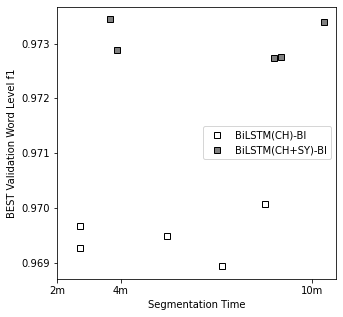

In [438]:
plot_hyperopt([
    "BiLSTM(CH)-BI",
    "BiLSTM(CH+SY)-BI",
], n=5)

./stats/seq_ch_conv_3lv.yaml-2020-06-03--12-11.20.csv
--😎 ID-CNN(CH)-BI
seq_ch_conv_3lv size=391291
Val WL-F1=0.9653 ./artifacts/seq_ch_conv_3lv.yaml-2020-06-03--12-11.20/run-8
  min=0.9634  |  max=0.9653
TEST: CL-f1=0.9739 WL-f1=0.9431 ⚠️ AVG TEST: WL-f1=0.9434±0.0004
conv:235|do:0.0008349951316932169|embc:32|embt:32|l1:39|oc:BI lr=3.88e-04 weight_decay=4.41e-04
avg traiing 113.96091842969258
./stats/seq_sy_ch_conv_3lv.yaml-2020-06-02--23-23.20.csv
--😎 ID-CNN(CH+SY)-BI
seq_sy_ch_conv_3lv size=1161791
Val WL-F1=0.9711 ./artifacts/seq_sy_ch_conv_3lv.yaml-2020-06-02--23-23.20/run-18
  min=0.9702  |  max=0.9711
TEST: CL-f1=0.9780 WL-f1=0.9545 ⚠️ AVG TEST: WL-f1=0.9536±0.0008
conv:200|do:0.21668210079692052|embc:32|embs:64|embt:32|l1:47|oc:BI lr=9.20e-04 weight_decay=1.17e-05
avg traiing 83.03768361886343


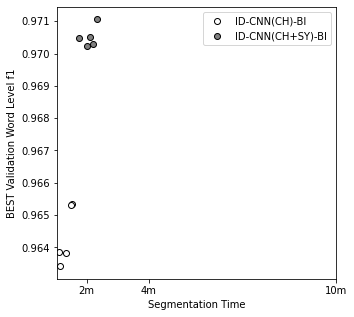

In [334]:
plot_hyperopt([
    "ID-CNN(CH)-BI",
    "ID-CNN(CH+SY)-BI",
], n=5)

./stats/seq_sy_conv_3lv.yaml-2020-06-02--08-19.20.csv
--😎 ID-CNN(SY)-BI
seq_sy_conv_3lv size=1136281
Val WL-F1=0.9706 ./artifacts/seq_sy_conv_3lv.yaml-2020-06-02--08-19.20/run-18
  min=0.9689  |  max=0.9706
TEST: CL-f1=0.9784 WL-f1=0.9543 ⚠️ AVG TEST: WL-f1=0.9530±0.0011
conv:208|do:0.23288288064838197|embs:64|l1:29|oc:BI lr=9.01e-04 weight_decay=2.27e-04
avg traiing 49.536540700594585
./stats/seq_sy_conv_3lv_scheme_a.yaml-2020-06-02--10-49.20.csv
--😎 ID-CNN(SY)-SchemeA
seq_sy_conv_3lv size=1136339
Val WL-F1=0.9702 ./artifacts/seq_sy_conv_3lv_scheme_a.yaml-2020-06-02--10-49.20/run-15
  min=0.9681  |  max=0.9702
TEST: CL-f1=0.9780 WL-f1=0.9531 ⚠️ AVG TEST: WL-f1=0.9523±0.0010
conv:207|do:0.36499381786170454|embs:64|l1:41|oc:SchemeASyLevel lr=7.02e-04 weight_decay=2.79e-04
avg traiing 51.64720451037089
./stats/seq_sy_conv_3lv_scheme_b.yaml-2020-06-02--10-49.20.csv
--😎 ID-CNN(SY)-SchemeB
seq_sy_conv_3lv size=1169615
Val WL-F1=0.9686 ./artifacts/seq_sy_conv_3lv_scheme_b.yaml-2020-06-02--10

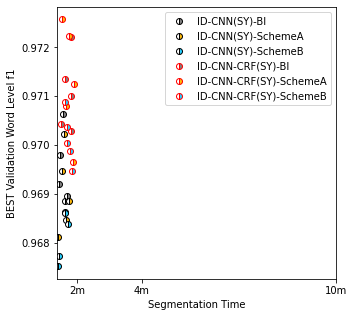

In [336]:
plot_hyperopt([
    "ID-CNN(SY)-BI",
    "ID-CNN(SY)-SchemeA",
    "ID-CNN(SY)-SchemeB",
    "ID-CNN-CRF(SY)-BI",
    "ID-CNN-CRF(SY)-SchemeA",
    "ID-CNN-CRF(SY)-SchemeB",
], n=5)

./stats/seq_sy_conv_3lv_crf_bi.yaml-2020-06-01--11-40.20.csv
--😎 ID-CNN-CRF(SY)-BI
seq_sy_conv_3lv size=1206435
Val WL-F1=0.9722 ./artifacts/seq_sy_conv_3lv_crf_bi.yaml-2020-06-01--11-40.20/run-12
TEST: CL-f1=0.9789 WL-f1=0.9563 ⚠️ AVG TEST: WL-f1=0.9548±0.0012
conv:232|crf:1|do:0.16956991381346276|embs:64|l1:35|oc:BI lr=9.67e-04 weight_decay=1.77e-04
avg traiing 157.46641794045766
./stats/seq_sy_conv_3lv_crf_scheme_a.yaml-2020-06-01--11-39.20.csv
--😎 ID-CNN-CRF(SY)-SchemeA
seq_sy_conv_3lv size=997375
Val WL-F1=0.9726 ./artifacts/seq_sy_conv_3lv_crf_scheme_a.yaml-2020-06-01--11-39.20/run-1
TEST: CL-f1=0.9788 WL-f1=0.9560 ⚠️ AVG TEST: WL-f1=0.9543±0.0014
conv:150|crf:1|do:0.16578140679250042|embs:64|l1:19|oc:SchemeASyLevel lr=8.55e-04 weight_decay=5.86e-04
avg traiing 159.5336995546023
./stats/seq_sy_conv_3lv_crf_scheme_b.yaml-2020-06-01--11-39.20.csv
--😎 ID-CNN-CRF(SY)-SchemeB
seq_sy_conv_3lv size=1092547
Val WL-F1=0.9709 ./artifacts/seq_sy_conv_3lv_crf_scheme_b.yaml-2020-06-01--11-39.

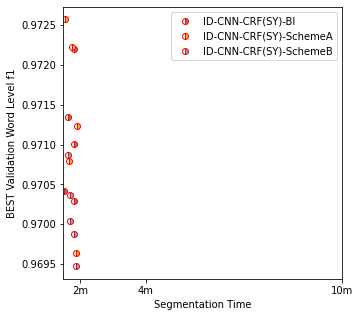

In [244]:
plot_hyperopt([
    "ID-CNN-CRF(SY)-BI",
    "ID-CNN-CRF(SY)-SchemeA",
    "ID-CNN-CRF(SY)-SchemeB",
], n=5)

# Expected Performance

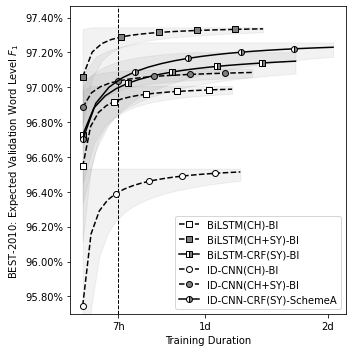

In [454]:
def plot_expected_perf(families, xticks):
    plt.figure(figsize=(5, 5))
    plt.axvline(7, ls="--", zorder=0, color="black", lw=1)

    for k in families:
        df = pd.read_csv(data[k]["path"])
        exp_perf = expected_max_performance.samplemax(df["best-val:word_level:f1"] * 100)
        mean = np.array(exp_perf["mean"])
        std = np.array(exp_perf["var"])
        _min, _max = exp_perf["min"], exp_perf["max"]
        avg_time = (df["training_took"] / (60*60)).mean()
        x = np.arange(0, df.shape[0]) * avg_time
        plt.plot(
            x, 
            exp_perf["mean"] ,
            marker=marker(k), 
            ls="-" if "CRF" in k else "--",
            label=k,
            markevery=4,
            markerfacecolor=markercolor(k),
            color="black",
            zorder=1 if "CNN" in k else 0,
            fillstyle="right" if "(SY)" in k else "full",
            markerfacecoloralt="white"
        )
        
        plt.fill_between(
            x,
            np.where(mean - std > _min, mean - std, _min),
            np.where(mean + std < _max, mean + std, _max),
            color="gray",
            alpha=0.1,
            zorder=0,
        )
    plt.ylim(95.7)
    plt.ylabel("BEST-2010: Expected Validation Word Level ${F_1}$")
    plt.xlabel("Training Duration")
    plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=2))

    if len(xticks) > 0:
        
        plt.xticks(*xticks)
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.legend()
    plt.tight_layout()

plot_expected_perf([
    "BiLSTM(CH)-BI",
    "BiLSTM(CH+SY)-BI",    
    "BiLSTM-CRF(SY)-BI",
    "ID-CNN(CH)-BI",
    "ID-CNN(CH+SY)-BI",
    "ID-CNN-CRF(SY)-SchemeA",
], xticks=([7, 24, 48], ["7h", "1d", "2d"]))



plt.savefig("./figures/expected_val_perf.png", dpi=300)

In [441]:
# from scipy import stats
from statsmodels.stats.weightstats import ttest_ind

In [416]:
col = "best-test:word_level:f1"

def ttest(d1, d2, plot=False):
    print('------')
    print(f"t-test({d1}, {d2})")
    
    df_ = pd.read_csv(data[d1]["path"])
    df_a = pd.read_csv(data[d2]["path"])
    if plot:
        plt.hist(df_[col], label=d1, alpha=0.8, bins=5)
        plt.hist(df_a[col], label=d2, alpha=0.8, bins=5)
        plt.legend()
    res = ttest_ind(df_[col], df_a[col], alternative="larger", usevar="unequal")
    print("statistic", res)
#     if res.statistic < 0:
#         pvalue = 1-res.pvalue/2
#     else:
#         pvalue = res.pvalue / 2
#     print(pvalue)
#     if pvalue < 0.05:
#         print("H0: two model families perform equally well (means of WL-F1 are the same, and variance isn't assumed to be equal)")
#         print("⚠️Reject H0: there is significant evidence that the means of WL-F1 from the two models are significantly different.")
#         print(f"pvalue={pvalue} < 0.025")
        
ttest("BiLSTM(CH+SY)-BI", "ID-CNN(CH+SY)-BI")

------
t-test(BiLSTM(CH+SY)-BI, ID-CNN(CH+SY)-BI)
statistic (1.642850637706139, 0.05467651647478284, 35.06405953150809)


In [417]:
ttest("BiLSTM-CRF(SY)-SchemeA", "BiLSTM-CRF(SY)-BI")
ttest("BiLSTM-CRF(SY)-SchemeB", "BiLSTM-CRF(SY)-BI")

------
t-test(BiLSTM-CRF(SY)-SchemeA, BiLSTM-CRF(SY)-BI)
statistic (-1.0574160584409849, 0.8512907509914259, 35.73170415282612)
------
t-test(BiLSTM-CRF(SY)-SchemeB, BiLSTM-CRF(SY)-BI)
statistic (-3.2221635510804845, 0.9986757934949283, 37.13345515576998)


In [418]:
ttest("ID-CNN-CRF(SY)-SchemeA", "ID-CNN-CRF(SY)-BI")
ttest("ID-CNN-CRF(SY)-SchemeB", "ID-CNN-CRF(SY)-BI")

------
t-test(ID-CNN-CRF(SY)-SchemeA, ID-CNN-CRF(SY)-BI)
statistic (0.12752277258747288, 0.4496041272546161, 37.48829832568661)
------
t-test(ID-CNN-CRF(SY)-SchemeB, ID-CNN-CRF(SY)-BI)
statistic (0.3245452392630004, 0.37367474026521463, 37.07352792592996)


In [422]:
ttest("ID-CNN-CRF(SY)-BI", "ID-CNN(SY)-BI")
ttest("ID-CNN-CRF(SY)-SchemeA", "ID-CNN(SY)-SchemeA")
ttest("ID-CNN-CRF(SY)-SchemeB", "ID-CNN(SY)-SchemeB")

------
t-test(ID-CNN-CRF(SY)-BI, ID-CNN(SY)-BI)
statistic (1.287320606370741, 0.10288567246027754, 37.985772907869645)
------
t-test(ID-CNN-CRF(SY)-SchemeA, ID-CNN(SY)-SchemeA)
statistic (1.5884888062373634, 0.0602321708731313, 37.99261688402346)
------
t-test(ID-CNN-CRF(SY)-SchemeB, ID-CNN(SY)-SchemeB)
statistic (2.3119962270603365, 0.01314695718575708, 37.99486106551443)


In [423]:
ttest("BiLSTM-CRF(SY)-BI", "BiLSTM(SY)-BI")
ttest("BiLSTM-CRF(SY)-SchemeA", "BiLSTM(SY)-SchemeA")
ttest("BiLSTM-CRF(SY)-SchemeB", "BiLSTM(SY)-SchemeB")

------
t-test(BiLSTM-CRF(SY)-BI, BiLSTM(SY)-BI)
statistic (2.044026288174466, 0.02482163874447204, 30.58643394595166)
------
t-test(BiLSTM-CRF(SY)-SchemeA, BiLSTM(SY)-SchemeA)
statistic (2.093148475297307, 0.02208595545004338, 32.71107739468587)
------
t-test(BiLSTM-CRF(SY)-SchemeB, BiLSTM(SY)-SchemeB)
statistic (-0.6733416525281346, 0.747464885694932, 35.66520003236852)
